In [2]:
from google.colab import drive

drive.mount('/content/drive')

!ls 'drive/My Drive'




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 bpm.behnejadi.rar
'Colab Notebooks'
'Copy of data.aug.rar'
 data.aug
 data.aug.rar
 data.mobilenet
 data.resnet50
 data.row
 dataset
 data.v
 data.vgg16
 data.xception
 IEEE_Iran_Section_Certificate_AIDLinAutoRobotics__Fateme_behnejadi__125598.pdf
 thesis


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.models import Model
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_path = '/content/drive/My Drive/data.vgg16/tc-ts/train'
valid_path = '/content/drive/My Drive/data.vgg16/tc-ts/valid'
test_path = '/content/drive/My Drive/data.vgg16/tc-ts/test'

In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['TS', 'TC'], batch_size=10, shuffle=False)

Found 2100 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 95 images belonging to 2 classes.


In [6]:
imgs, labels = next(train_batches)

In [7]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

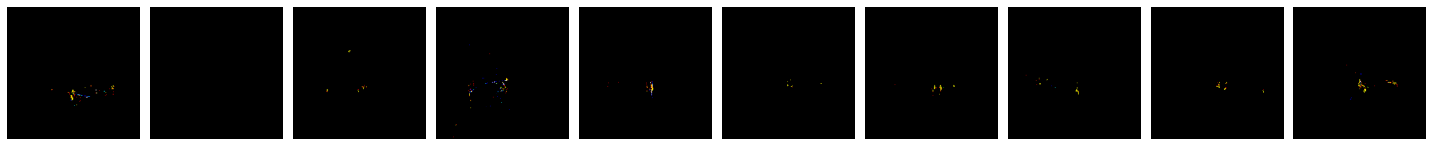

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [8]:
plotImages(imgs)
print(labels)

In [9]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context


In [10]:
vgg16_model = tf.keras.applications.vgg16.VGG16()
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
x = vgg16_model.layers[-1].output

In [12]:
output = Dense(units=2, activation='softmax')(x)

In [13]:
model = Model(inputs=vgg16_model.input, outputs=output)

In [14]:
for layer in model.layers[22:]:
    layer.trainable = True
for layer in model.layers[:22]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 False
16 block5_conv2 False
17 block5_conv3 False
18 block5_pool False
19 flatten False
20 fc1 False
21 fc2 False
22 predictions True
23 dense True


In [15]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=50,
          verbose=2
)



Epoch 1/50
210/210 - 15s - loss: 0.4400 - accuracy: 0.8986 - val_loss: 0.5560 - val_accuracy: 0.7556
Epoch 2/50
210/210 - 15s - loss: 0.4304 - accuracy: 0.8981 - val_loss: 0.5601 - val_accuracy: 0.7333
Epoch 3/50
210/210 - 15s - loss: 0.4215 - accuracy: 0.8995 - val_loss: 0.5558 - val_accuracy: 0.7222
Epoch 4/50
210/210 - 15s - loss: 0.4124 - accuracy: 0.9090 - val_loss: 0.5556 - val_accuracy: 0.7111
Epoch 5/50
210/210 - 15s - loss: 0.4042 - accuracy: 0.9143 - val_loss: 0.5542 - val_accuracy: 0.7000
Epoch 6/50
210/210 - 15s - loss: 0.3960 - accuracy: 0.9229 - val_loss: 0.5540 - val_accuracy: 0.7111
Epoch 7/50
210/210 - 14s - loss: 0.3882 - accuracy: 0.9295 - val_loss: 0.5537 - val_accuracy: 0.7333
Epoch 8/50
210/210 - 15s - loss: 0.3809 - accuracy: 0.9343 - val_loss: 0.5487 - val_accuracy: 0.7111
Epoch 9/50
210/210 - 15s - loss: 0.3732 - accuracy: 0.9390 - val_loss: 0.5442 - val_accuracy: 0.7444
Epoch 10/50
210/210 - 15s - loss: 0.3662 - accuracy: 0.9376 - val_loss: 0.5520 - val_accura

In [18]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [19]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [25]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [27]:
test_batches.class_indices

{'TC': 1, 'TS': 0}

Confusion matrix, without normalization
[[28  7]
 [12 48]]


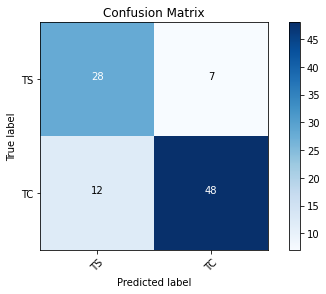

In [28]:
cm_plot_labels = ['TS','TC']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')